## 1- problem Definition and understanding

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to **understand which products, regions, categories and customer segments they should target or avoid**

You can even take this a step further and try and **build a Regression model to predict Sales or Profit.**

Dataset: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

## 1-1 Asking questions

- What are the top selling products in the superstore?
- What is the sales trend over time (monthly, yearly)?
- Which category of products generates the highest revenue and profit?
- Which region generates the most sales?
- What is the impact of discounts and promotions on sales?
- What is the average profit margin for each product category?
- Which sub-category of products has the highest demand?

# 2- Data understanding

* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.

# Data wrangling
## refers to a variety of processes designed to transform raw data into more readily used formats

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv('Sample_Superstore.csv',encoding='windows-1252')

In [5]:
# Set the maximum number of columns to display
pd.options.display.max_columns = None
# Set the maximum number of rows to display
pd.options.display.max_rows = None


In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
556,557,CA-2016-113243,06/10/2016,6/15/2016,Standard Class,OT-18730,Olvera Toch,Consumer,United States,Los Angeles,California,90045,West,OFF-LA-10001297,Office Supplies,Labels,Avery 473,20.700,2,0.0,9.9360
3511,3512,CA-2014-166863,6/20/2014,6/24/2014,Standard Class,SC-20020,Sam Craven,Consumer,United States,Plano,Texas,75023,Central,OFF-ST-10004123,Office Supplies,Storage,Safco Industrial Wire Shelving System,509.488,7,0.2,-127.3720
6166,6167,CA-2014-103989,3/19/2014,3/21/2014,First Class,MC-17605,Matt Connell,Corporate,United States,Lakeland,Florida,33801,South,TEC-AC-10002647,Technology,Accessories,Logitech Wireless Boombox Speaker - portable -...,170.240,2,0.2,53.2000
3755,3756,CA-2016-116799,03/03/2016,03/06/2016,First Class,JG-15310,Jason Gross,Corporate,United States,Odessa,Texas,79762,Central,OFF-PA-10001892,Office Supplies,Paper,"Rediform Wirebound ""Phone Memo"" Message Book, ...",42.784,7,0.2,15.5092
1064,1065,CA-2015-161263,4/16/2015,4/21/2015,Standard Class,TS-21160,Theresa Swint,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10002115,Technology,Phones,Plantronics 81402,118.782,3,0.4,-27.7158


### checking data type and missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9996 non-null   int64  
 1   Order ID       9996 non-null   object 
 2   Order Date     9996 non-null   object 
 3   Ship Date      9996 non-null   object 
 4   Ship Mode      9996 non-null   object 
 5   Customer ID    9996 non-null   object 
 6   Customer Name  9996 non-null   object 
 7   Segment        9996 non-null   object 
 8   Country        9996 non-null   object 
 9   City           9996 non-null   object 
 10  State          9996 non-null   object 
 11  Postal Code    9996 non-null   int64  
 12  Region         9996 non-null   object 
 13  Product ID     9996 non-null   object 
 14  Category       9996 non-null   object 
 15  Sub-Category   9996 non-null   object 
 16  Product Name   9996 non-null   object 
 17  Sales          9996 non-null   float64
 18  Quantity

In [8]:
#  ship date and order date shown as object data type, so can not make a math operations 
            # so it is better to change to datetime data type 

In [9]:
# to change the data type of ship date and order date columns 
df['Order Date'] = pd.to_datetime( df['Order Date'])
df['Ship Date'] = pd.to_datetime( df['Ship Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9996 non-null   int64         
 1   Order ID       9996 non-null   object        
 2   Order Date     9996 non-null   datetime64[ns]
 3   Ship Date      9996 non-null   datetime64[ns]
 4   Ship Mode      9996 non-null   object        
 5   Customer ID    9996 non-null   object        
 6   Customer Name  9996 non-null   object        
 7   Segment        9996 non-null   object        
 8   Country        9996 non-null   object        
 9   City           9996 non-null   object        
 10  State          9996 non-null   object        
 11  Postal Code    9996 non-null   int64         
 12  Region         9996 non-null   object        
 13  Product ID     9996 non-null   object        
 14  Category       9996 non-null   object        
 15  Sub-Category   9996 n

In [11]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
# what about duplication 
# if found should be deleted
df.duplicated().sum()

2

In [13]:
df[df.duplicated().values == True].index

Index([9994, 9995], dtype='int64')

In [14]:
# delete the duplicated row
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

### some statistical information
Understanding the distribution of the data: The mean, min, max, and other metrics provide a quick overview of the distribution of the data.

Outlier detection: The min, 25%, 75%, and max values can help identify outliers in the data.

Data normalization: The mean and std values can be used to normalize the data.

Feature scaling: The min, max, and other values can be used to scale the features to a suitable range.

In [16]:
# for non object columns 
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [17]:
# for the profit column
                    # there is a negative number in the profit column that is mean, the company sometime loss
                    # the max number is much bigger than 75% , that mean there is outliers 
# for the sales column
                    # the max number is much bigger than 75% , that mean there is outliers 
# from the order date, notice the the collected data for about 4 years 
# from the ship date, notice the the delivery time about 4 - 5 dayes                     

*shown the number of unique values*

In [18]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [19]:
# the active working days is 1237 (4 years = 1464days,off days-> 4*12*4*2 = 384days,non active days--> 1464 - 1237 = 227 days )
# the totola customer that dealt with the company is 793 
            # that is mean some of these customer dealt more than once 
    

In [20]:
df['Customer Name'].value_counts()

Customer Name
William Brown             37
John Lee                  34
Matt Abelman              34
Paul Prost                34
Chloris Kastensmidt       32
Seth Vernon               32
Jonathan Doherty          32
Edward Hooks              32
Zuschuss Carroll          31
Emily Phan                31
Arthur Prichep            31
Lena Cacioppo             30
Sally Hughsby             29
Dean percer               29
Brian Moss                29
Greg Tran                 29
Ken Lonsdale              29
Keith Dawkins             28
Clay Ludtke               28
Kunst Miller              28
Chris Selesnick           28
Xylona Preis              28
Ben Ferrer                27
Damala Kotsonis           27
Patrick Gardner           26
Cassandra Brandow         26
Laura Armstrong           26
Noel Staavos              26
Steven Cartwright         26
Stewart Visinsky          25
Pete Kriz                 25
Clytie Kelty              25
Erin Ashbrook             25
Adam Shillingsburg        25


In [21]:
# top 5 customers ( number of sales )[:5]
df['Customer Name'].value_counts()[:5]

Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
Name: count, dtype: int64

In [22]:
# where the 1st top 5 customer buy 
df[df['Customer Name'] == 'William Brown'].groupby("Region").size()

Region
Central     5
East        8
West       24
dtype: int64

In [23]:
# total sales for the 1st top 5 customer 
df[df['Customer Name'] == 'William Brown'].Sales.sum()

6160.102000000001

In [24]:
# top 5 customers ( amount)
df.groupby("Customer Name").Sales.sum().sort_values(ascending=False)[:5]

Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64

In [25]:
df[df['Customer Name'] == 'Sean Miller']['Customer Name'].value_counts()

Customer Name
Sean Miller    15
Name: count, dtype: int64

In [26]:
df[df['Customer Name'] == 'Adrian Barton']['Customer Name'].value_counts()

Customer Name
Adrian Barton    20
Name: count, dtype: int64

In [27]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [28]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [29]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [30]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

<Axes: xlabel='Category'>

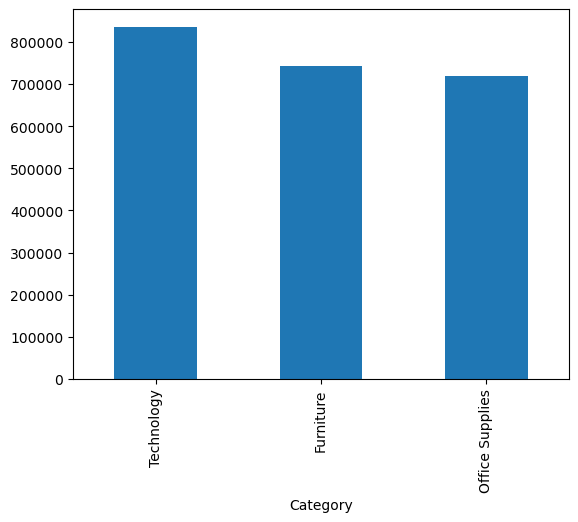

In [205]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')

In [31]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

<Axes: xlabel='Category'>

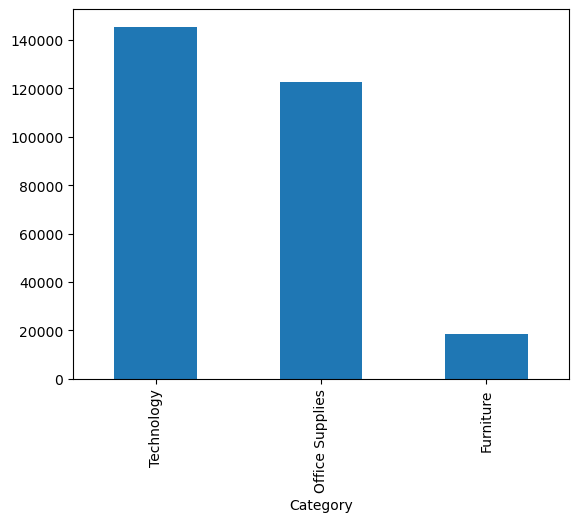

In [206]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

In [32]:
df.groupby('Category').Discount.size().sort_values(ascending=False)

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: Discount, dtype: int64

In [33]:
df.groupby(['Region','Category']).size()

Region   Category       
Central  Furniture           481
         Office Supplies    1422
         Technology          420
East     Furniture           601
         Office Supplies    1712
         Technology          535
South    Furniture           332
         Office Supplies     995
         Technology          293
West     Furniture           707
         Office Supplies    1897
         Technology          599
dtype: int64

### What are the top selling products in the superstore?

In [34]:
# top_selling_products
df.groupby('Product Name').Sales.sum().sort_values(ascending=False).head(5)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

### top-profitable products ?

In [35]:
df.groupby('Product Name').Profit.sum().sort_values(ascending=False).head(5)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64

### Are the top-selling products the most profitable?

<Axes: xlabel='Product Name'>

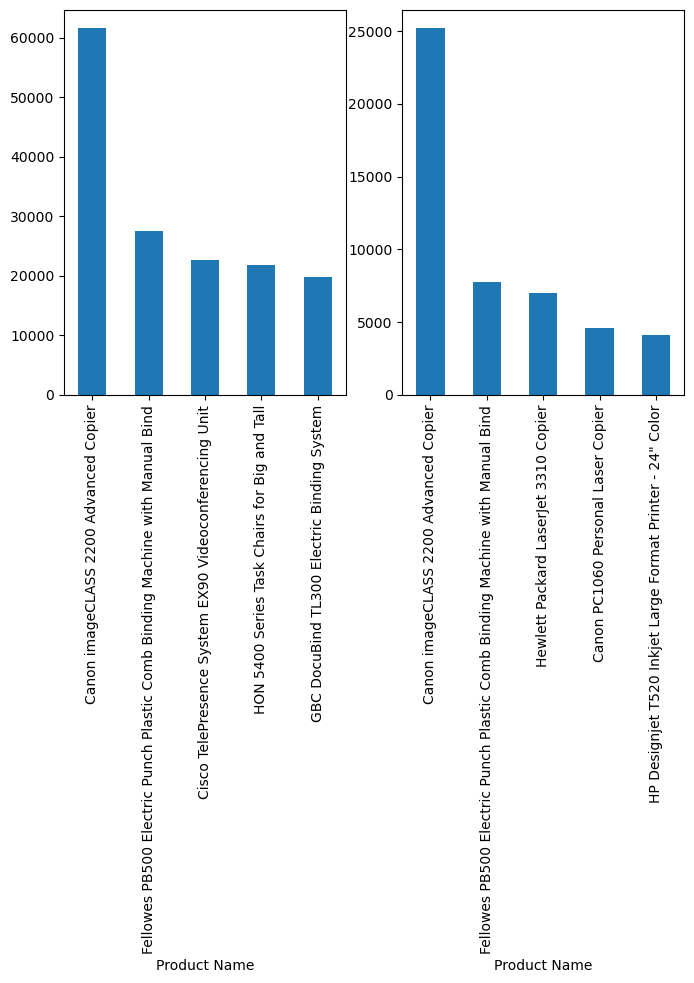

In [36]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df.groupby('Product Name').Sales.sum().sort_values(ascending=False).head(5).plot(kind= 'bar')
plt.subplot(1,2,2)
df.groupby('Product Name').Profit.sum().sort_values(ascending=False).head(5).plot(kind='bar')

## Now we can conclude some things
**top_5_selling_products:**
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
- Cisco TelePresence System EX90 Videoconferencing Unit
- HON 5400 Series Task Chairs for Big and Tall
- GBC DocuBind TL300 Electric Binding System

**top_5_profit_products:**
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
- Hewlett Packard LaserJet 3310 Copier
- Canon PC1060 Personal Laser Copier
- HP Designjet T520 Inkjet Large Format Printer - 24" Color

**The highest selling products, and the most profitable**
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind


# Exploratory Data Analysis - EDA

In [39]:
df.Region.value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [40]:
nu_sales = df[df['Product Name']=='Canon imageCLASS 2200 Advanced Copier'].groupby('Region').size()
nu_sales

Region
Central    1
East       3
West       1
dtype: int64

In [41]:
df[df['Product Name']=='Canon imageCLASS 2200 Advanced Copier'].groupby('Region').Sales.sum()

Region
Central    17499.950
East       30099.914
West       13999.960
Name: Sales, dtype: float64

In [42]:
df[df['Product Name']=='Canon imageCLASS 2200 Advanced Copier'].groupby('Region').Profit.sum()

Region
Central     8399.9760
East       10079.9712
West        6719.9808
Name: Profit, dtype: float64

In [146]:
pp = df[df['Product Name']=='Canon imageCLASS 2200 Advanced Copier']
summ = pp.groupby(['Region'])[['Sales', 'Profit', 'Discount']].sum()
summ

,Sales,Profit,Discount
Region,,,
Central,17499.950,8399.9760,0.0
East,30099.914,10079.9712,0.6
West,13999.960,6719.9808,0.0


In [143]:
summ['nu_sales'] = nu_sales
summ

,Sales,Profit,Discount,nu_sales
Region,,,,
Central,17499.950,8399.9760,0.0,1
East,30099.914,10079.9712,0.6,3
West,13999.960,6719.9808,0.0,1


<Axes: xlabel='Region'>

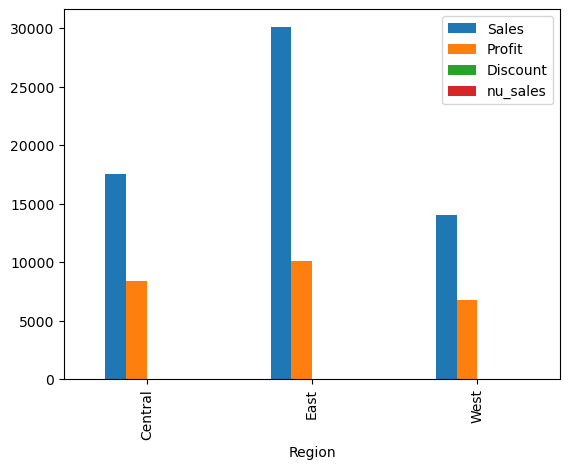

In [144]:
summ.plot(kind='bar')
# plt.grid(axis='y')

In [46]:
Fellowes_regin_size =df[df['Product Name']=='Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind'].groupby('Region').size()
Fellowes_regin_size

Region
Central    3
East       2
South      2
West       3
dtype: int64

In [47]:
Fellowes_regin_s_p = df[df['Product Name']=='Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind']
Fellowes_regin_s_p = Fellowes_regin_s_p.groupby(['Region'])[['Sales', 'Profit']].sum()
Fellowes_regin_s_p

,Sales,Profit
Region,,
Central,6100.752,-1525.188
East,5592.356,2414.881
South,7625.940,3812.970
West,8134.336,3050.376


In [48]:
Fellowes_regin_s_p['Fellowes_regin_size'] = Fellowes_regin_size
Fellowes_regin_s_p

,Sales,Profit,Fellowes_regin_size
Region,,,
Central,6100.752,-1525.188,3
East,5592.356,2414.881,2
South,7625.940,3812.970,2
West,8134.336,3050.376,3


<Axes: xlabel='Region'>

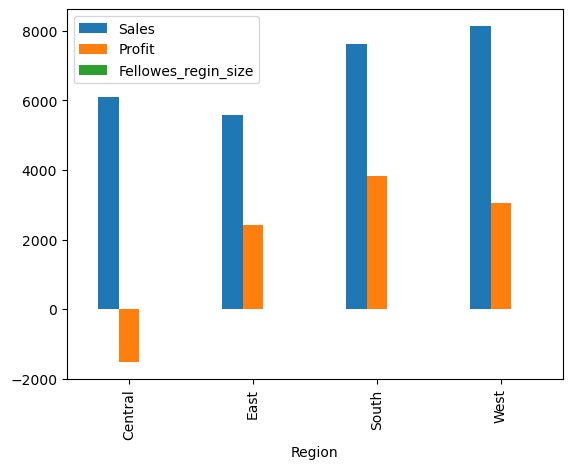

In [49]:
Fellowes_regin_s_p.plot(kind='bar')

In [50]:
# to explore why the profit is down in central rejion ( show the discount)
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]
product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,2847,CA-2017-152093,2017-09-10,2017-09-15,Standard Class,SN-20560,Skye Norling,Home Office,United States,Chicago,Illinois,60653,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,5311,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,Texas,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,7684,CA-2015-120782,2015-04-28,2015-05-01,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,Michigan,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


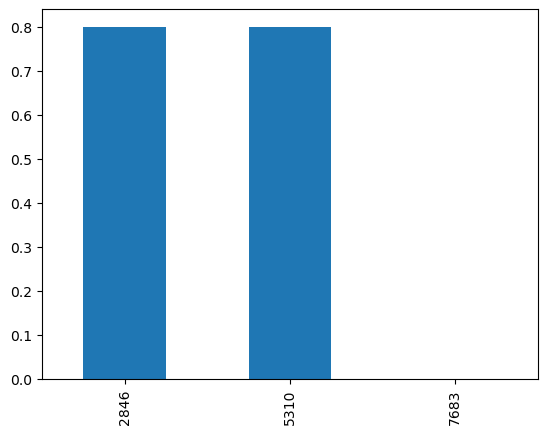

In [51]:
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]

# Plot a histogram of the discounts offered for the product in the central region
product["Discount"].plot(kind="bar")

# Show the plot
plt.show()


The company loses when it sells its **Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind** products in the Central! as it make 80% discount on 2 products from 3 products

# What is the sales trend over time (monthly, yearly)?

In [124]:
date_sales = df.groupby(['Order Date'], as_index=False).Sales.sum()
date_sales

,Order Date,Sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
5,2014-01-09,40.5440
6,2014-01-10,54.8300
7,2014-01-11,9.9400
8,2014-01-13,3553.7950
9,2014-01-14,61.9600


In [125]:
date_sales.max()

Order Date    2017-12-30 00:00:00
Sales                   28106.716
dtype: object

In [128]:
# resample working only when the date column is the index 
# Resample the data into monthly intervals
monthly_sales = fg.set_index('Order Date').resample('M').sum()
monthly_sales 

,Sales
Order Date,
2014-01-31,14236.8950
2014-02-28,4519.8920
2014-03-31,55691.0090
2014-04-30,28295.3450
2014-05-31,23648.2870
2014-06-30,34595.1276
2014-07-31,33946.3930
2014-08-31,27909.4685
2014-09-30,81777.3508


In [130]:
monthly_sales.max()

Sales    118447.825
dtype: float64

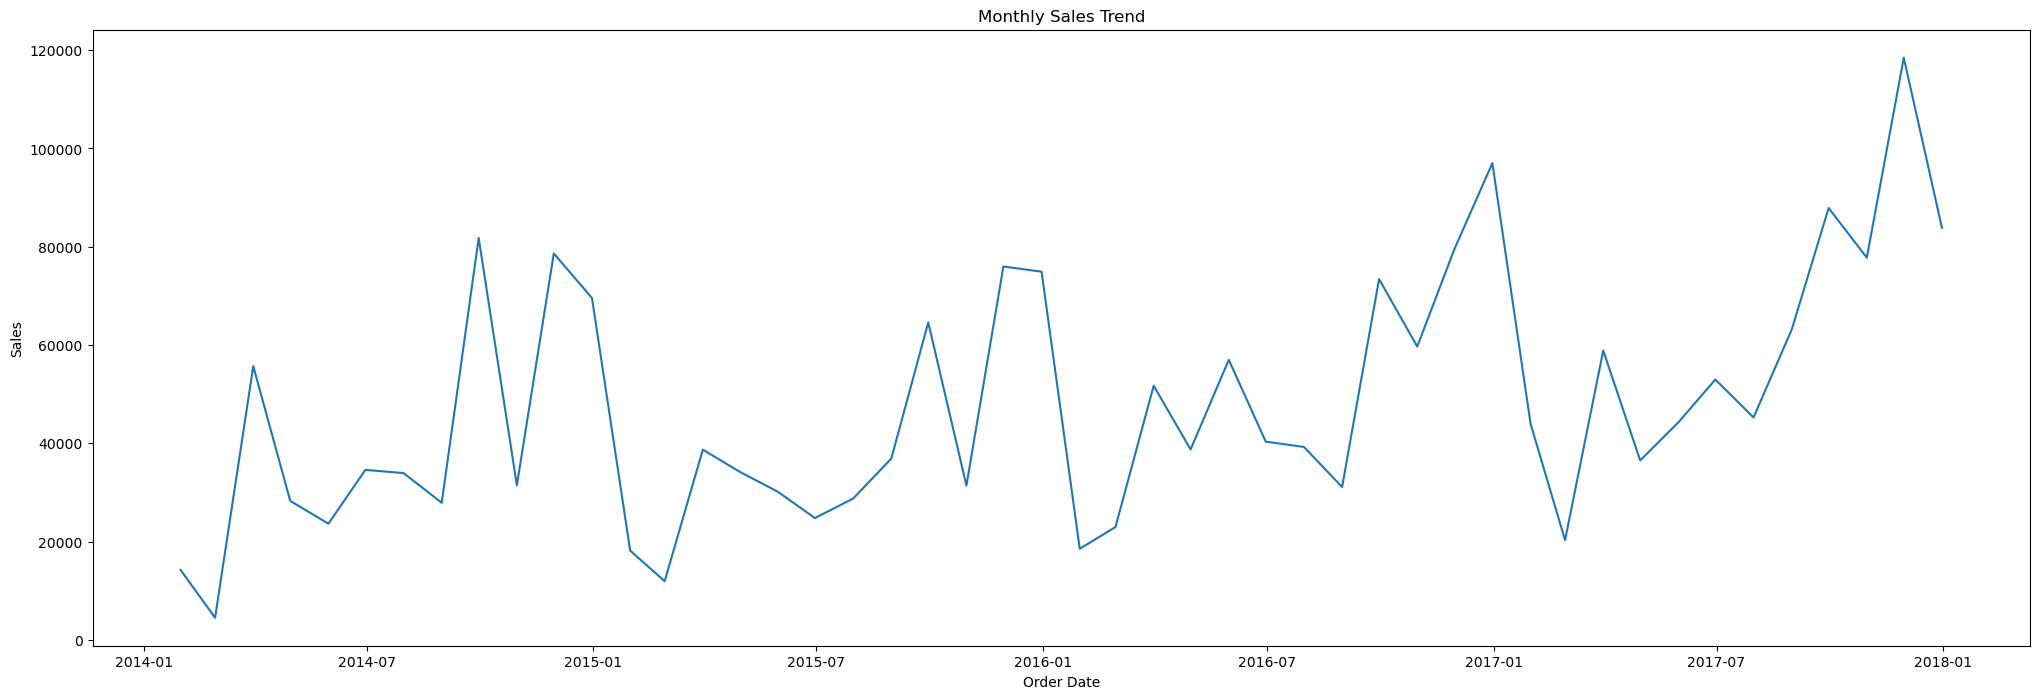

In [132]:
plt.figure(figsize=(25,8))
plt.plot(monthly_sales)
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.show()

In [133]:
# Resample the data into yearly intervals
yearly_sales = fg.set_index('Order Date').resample('Y').sum()
yearly_sales

,Sales
Order Date,
2014-12-31,484247.4981
2015-12-31,470532.5090
2016-12-31,609205.5980
2017-12-31,733215.2552


In [134]:
yearly_sales.max()

Sales    733215.2552
dtype: float64

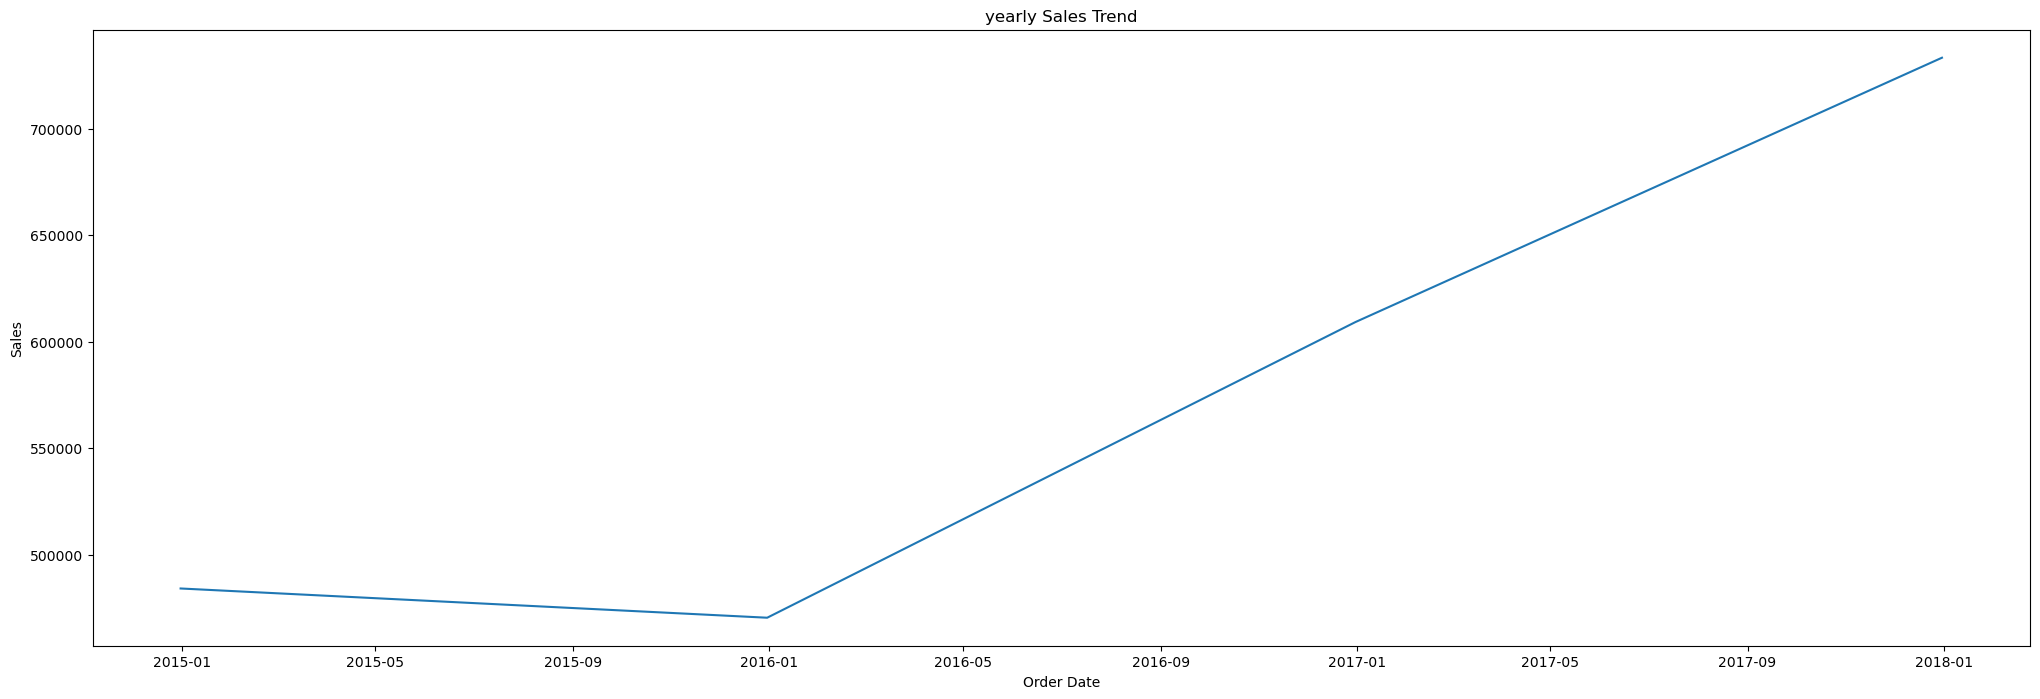

In [135]:
plt.figure(figsize=(25,8))
plt.plot(yearly_sales)
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("yearly Sales Trend")
plt.show()


**The general trend of the company is profit, but there are some periods in which profits decrease and then rise again. I think it's because of the discounts**

## Which region & place generates the most sales?

In [150]:
df_places = df[['City','State','Region','Sales','Profit']]

In [152]:
df_places.head(10)

,City,State,Region,Sales,Profit
0,Henderson,Kentucky,South,261.9600,41.9136
1,Henderson,Kentucky,South,731.9400,219.5820
2,Los Angeles,California,West,14.6200,6.8714
3,Fort Lauderdale,Florida,South,957.5775,-383.0310
4,Fort Lauderdale,Florida,South,22.3680,2.5164
5,Los Angeles,California,West,48.8600,14.1694
6,Los Angeles,California,West,7.2800,1.9656
7,Los Angeles,California,West,907.1520,90.7152
8,Los Angeles,California,West,18.5040,5.7825
9,Los Angeles,California,West,114.9000,34.4700


In [177]:
region_sales = df.groupby('Region').Sales.sum().sort_values(ascending=False)
region_sales

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

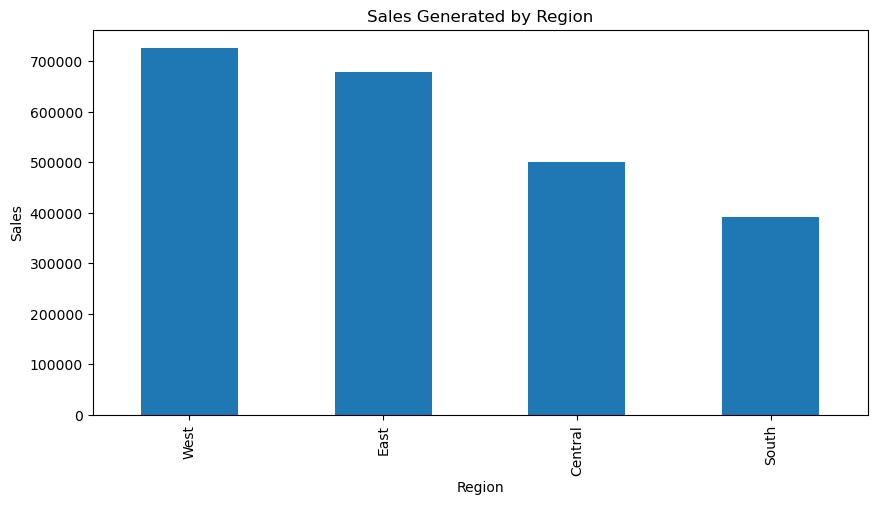

In [189]:

plt.figure(figsize=(10,5))
region_sales.plot(kind='bar')
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Sales Generated by Region")
plt.xticks(rotation=90)
plt.show()

In [192]:
state_sales = df.groupby('State').Sales.sum().sort_values(ascending=False)
state_sales 

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

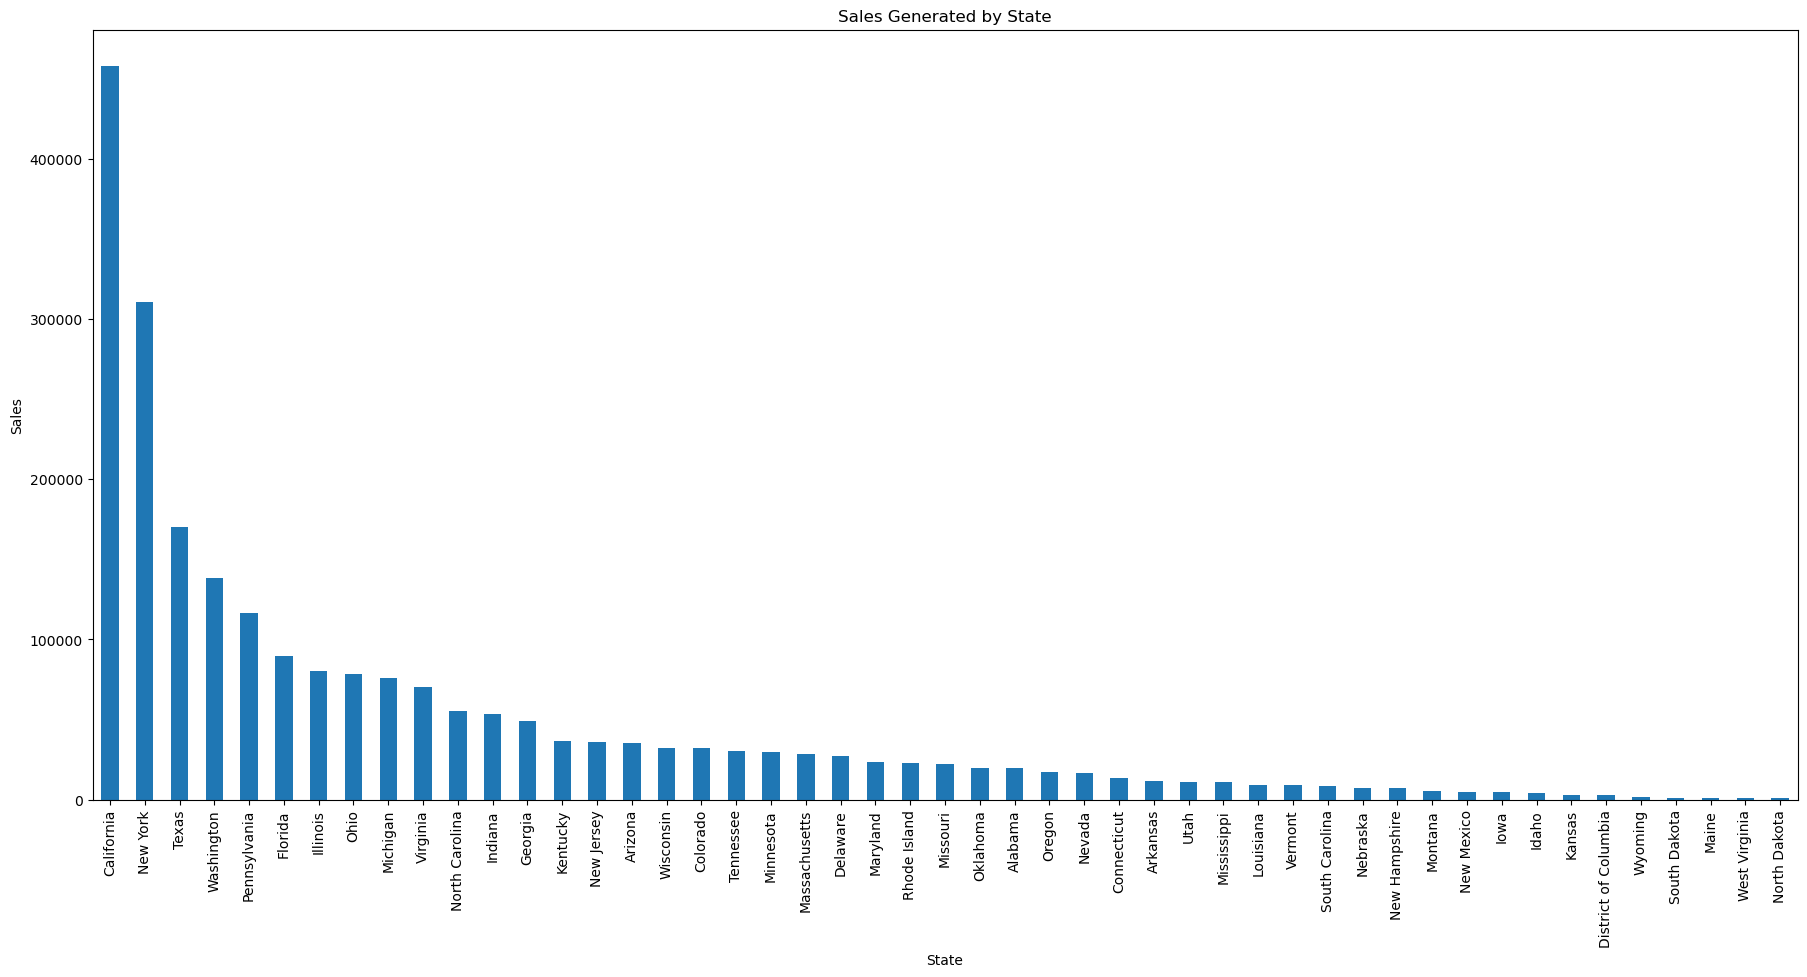

In [193]:
plt.figure(figsize=(22,10))
state_sales.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()


In [197]:
city_sales = df.groupby('City').Sales.sum().sort_values(ascending=False)
city_sales

City
New York City        256368.1610
Los Angeles          175851.3410
Seattle              119540.7420
San Francisco        112669.0920
Philadelphia         109077.0130
Houston               64504.7604
Chicago               48539.5410
San Diego             47521.0290
Jacksonville          44713.1830
Springfield           43054.3420
Detroit               42446.9440
Columbus              38706.2430
Newark                28576.1190
Columbia              25283.3240
Lafayette             25036.2000
Jackson               24963.8580
San Antonio           21843.5280
Burlington            21668.0820
Arlington             20214.5320
Dallas                20131.9322
Lakewood              18192.0470
Richmond              18137.9300
Henderson             17549.0680
Atlanta               17197.8400
Minneapolis           16870.5400
Providence            15980.6500
Charlotte             13693.3390
Long Beach            13455.0300
Louisville            12345.8060
Denver                12198.7930
Auror

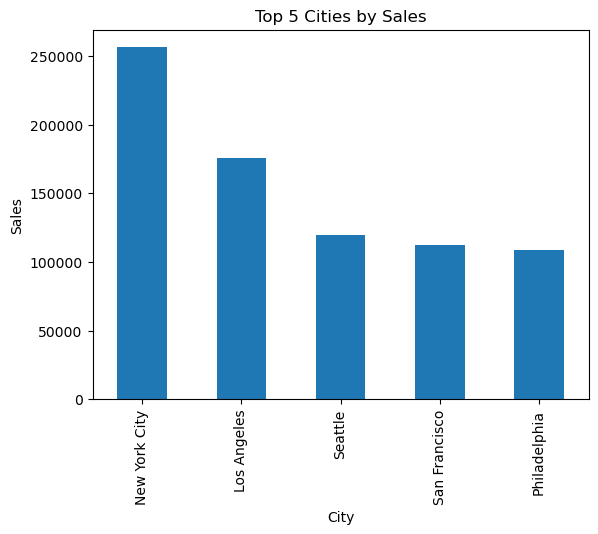

In [198]:
city_sales[:5].plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Top 5 Cities by Sales")
plt.xticks(rotation=90)

plt.show()


## top placies are :
**Cities**: [New York City, Los Angeles, Seattle, San Francisco, Detroit]

**State** : [california, New York]

**Region** : [West]

# What is the impact of discounts on sales?


In [168]:
df.Discount.value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

# the best salles 

The best sales are when the discount is 50%, but this leads to loss and non-profitability.

The discount from 10 to 20%. Is the best solution, as they are the second and third best sellers and make profits

In [211]:
df[['Sales','Discount','Profit']].corr(numeric_only=True)

,Sales,Discount,Profit
Sales,1.000000,-0.028190,0.479064
Discount,-0.028190,1.000000,-0.219487
Profit,0.479064,-0.219487,1.000000


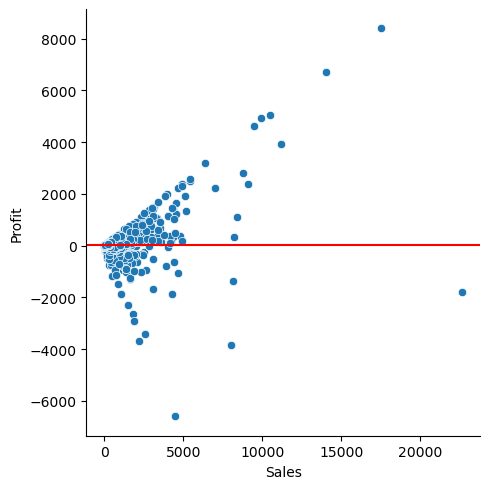

In [261]:
profit_median = df['Profit'].median()
sns.relplot(x='Sales', y= 'Profit', data=df)
plt.axhline(profit_median, color = 'r')

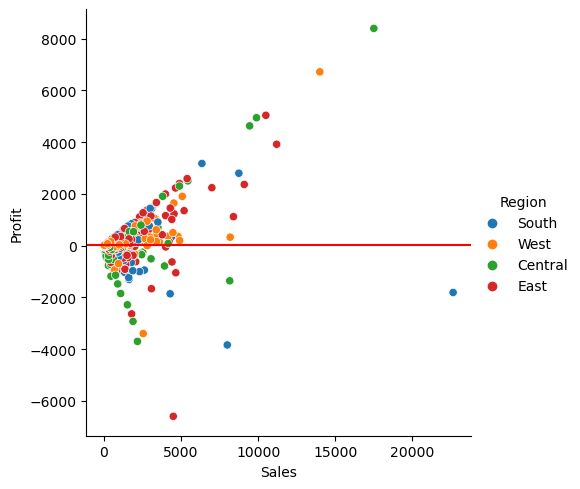

In [265]:
sns.relplot(x='Sales', y= 'Profit', data=df , hue= 'Region')
plt.axhline(profit_median, color = 'r')

In [252]:
df_new1 = df[df['Sales']>4000][df['Region'] == 'East'][df['Profit'] < 0]
df_new1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
1803,1804,CA-2017-158379,2017-09-22,2017-09-26,Second Class,JA-15970,Joseph Airdo,Consumer,United States,Philadelphia,Pennsylvania,19134,East,OFF-SU-10002881,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4663.736,7,0.2,-1049.3406,-0.225000
6535,6536,CA-2014-128209,2014-11-17,2014-11-22,Standard Class,GT-14710,Greg Tran,Consumer,United States,Buffalo,New York,14215,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,4007.840,10,0.2,-50.0980,-0.012500
7243,7244,CA-2017-118892,2017-08-17,2017-08-22,Second Class,TP-21415,Tom Prescott,Consumer,United States,Philadelphia,Pennsylvania,19134,East,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,4416.174,9,0.3,-630.8820,-0.142857
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,-1.466667


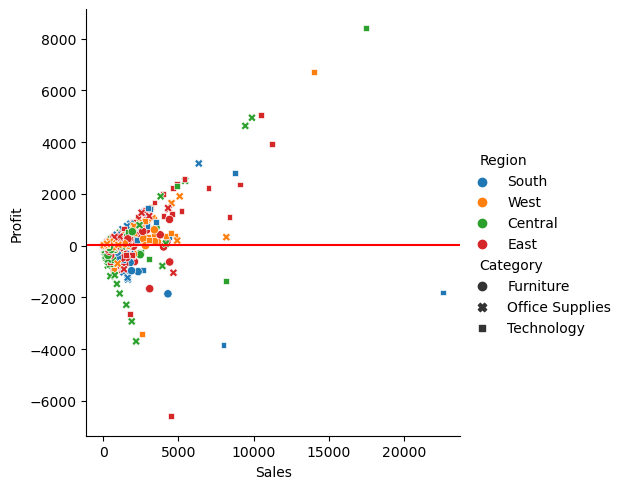

In [272]:
sns.relplot(x='Sales', y= 'Profit', data=df, hue= 'Region', style='Category' )
plt.axhline(profit_median, color = 'r')

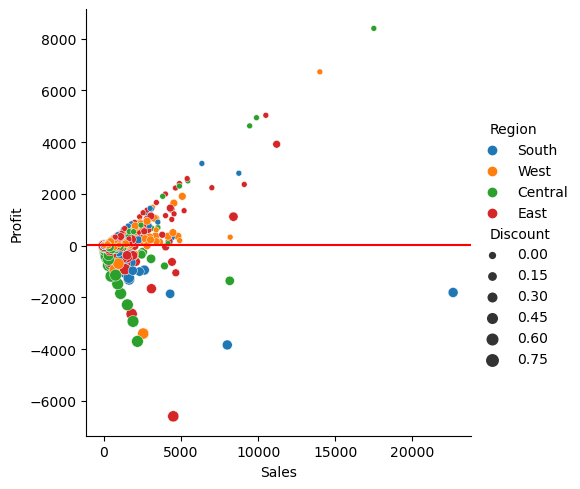

In [273]:
sns.relplot(x='Sales', y= 'Profit', data=df, hue= 'Region',  size='Discount')
plt.axhline(profit_median, color = 'r')
plt.show()

In [202]:
df[df['Profit']<0].groupby('Region').Profit.sum()

Region
Central   -56314.8850
East      -49590.6075
South     -27504.8323
West      -22720.9609
Name: Profit, dtype: float64

# Machine Learning

In [ ]:
df.head()

# Types of systems we can make on this dataset
- Sales forecasting

- Customer segmentation.

- Product recommendation.

- Anomaly detection.

